# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [2]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [5]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [7]:
# Step 2: Make the API Request

base_url =  'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [9]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [11]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [13]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [15]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\anshu\AppData\Local\Temp\ipykernel_20748\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [17]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


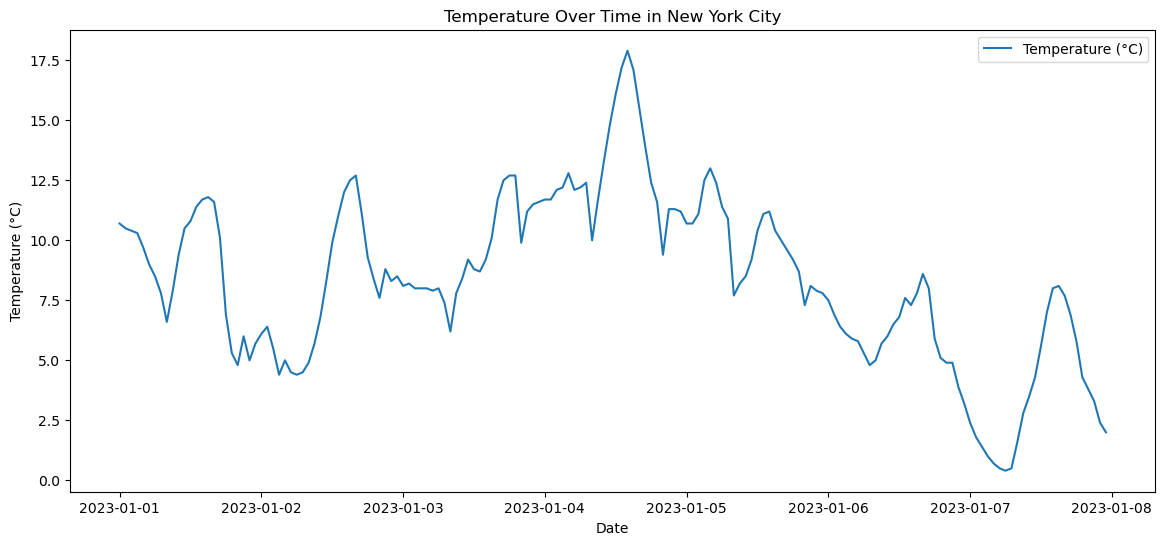

In [19]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

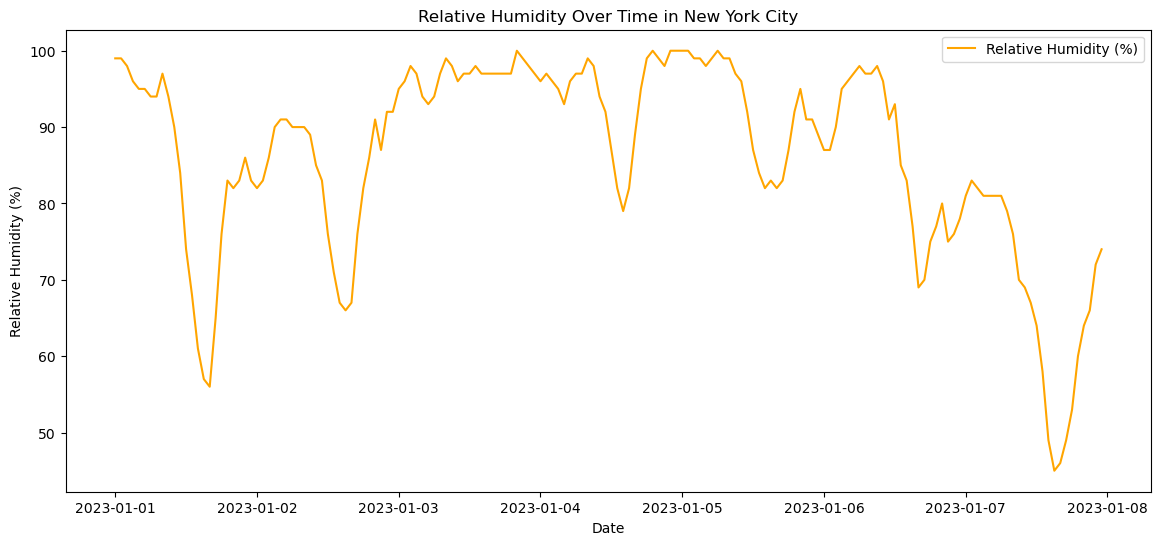

In [21]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


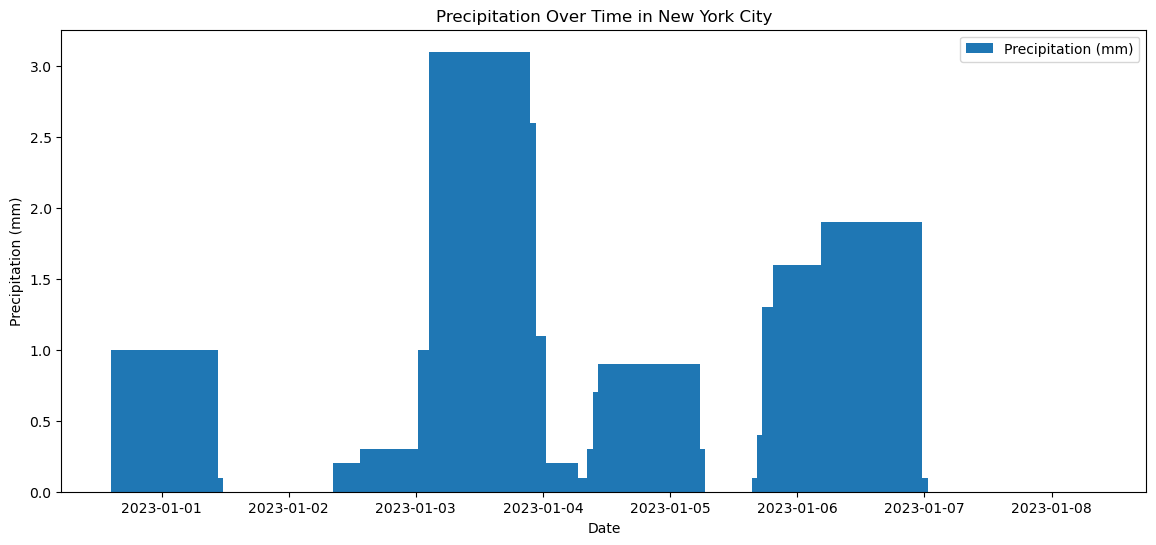

In [23]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [25]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


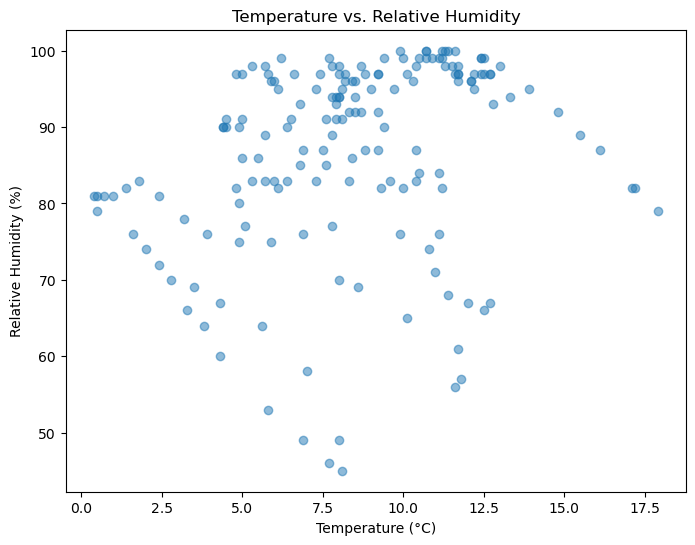

In [27]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [29]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


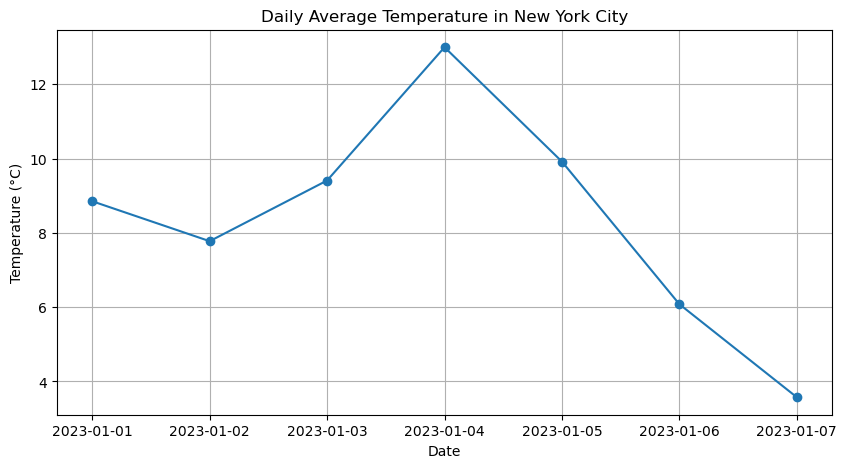

In [31]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [18]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


/tmp/ipykernel_12210/4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [19]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [20]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


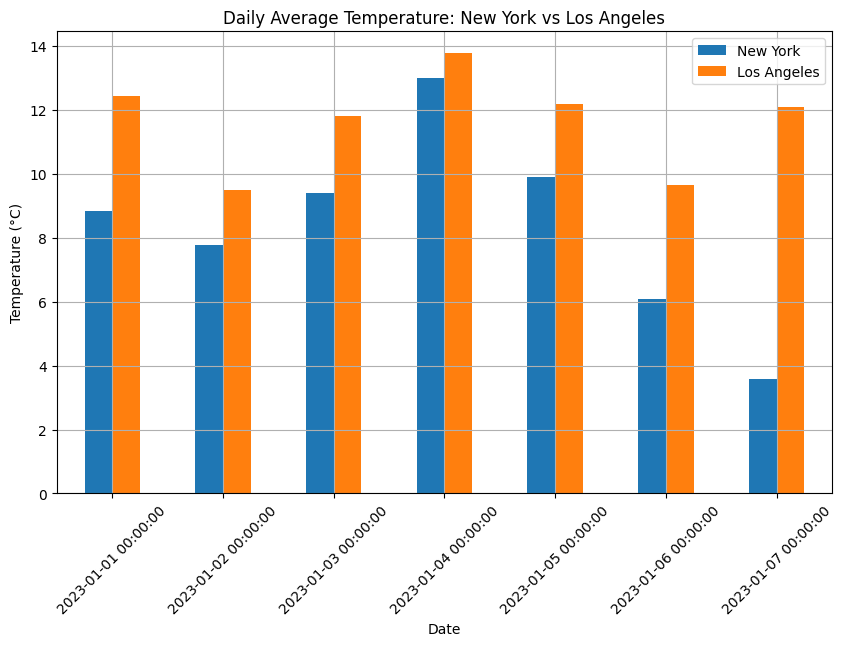

In [21]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [22]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [23]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [6]:
#Location coordinates for 'London' 

latitude = 51.5074
longitude = -0.1278
start_date = "2022-01-01"
end_date = "2022-12-31"

base_url = 'https://archive-api.open-meteo.com/v1/archive'

#Setting Params
params_ld = {
          'latitude':latitude,
          'longitude':longitude,
          'start_date':start_date,
          'end_date':end_date,
          'hourly':['precipitation'],
          'timezone':'Europe/London'
}

response_ld = requests.get(base_url, params=params_ld)

In [7]:
#Checking if request was a successful

if response_ld.status_code == 200:
    print('Data was fetched successfully!')
else:
    print(f"Data Fetching was unsuccessful. Status_code = {response.status_code}")

Data was fetched successfully!


In [8]:
#Loading data

data_ld = response_ld.json()
hourly_data = data_ld['hourly']

df_ld = pd.DataFrame(hourly_data)
df_ld.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [9]:
df_ld.dtypes

time              object
precipitation    float64
dtype: object

In [14]:
#Converting time to datetime
df_ld['time']= pd.to_datetime(df_ld['time'])

In [16]:
#Setting time as index
df_ld.set_index('time', inplace=True)

In [18]:
df_ld.isnull().sum()

precipitation    0
dtype: int64

In [20]:
#Filling NaNs if any using ffill
df_ld.fillna(method='ffill', inplace = True)

C:\Users\anshu\AppData\Local\Temp\ipykernel_27140\3433027318.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ld.fillna(method='ffill', inplace = True)


In [22]:
df_ld.describe()

,precipitation
count,8760.000000
mean,0.075662
std,0.404500
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.700000


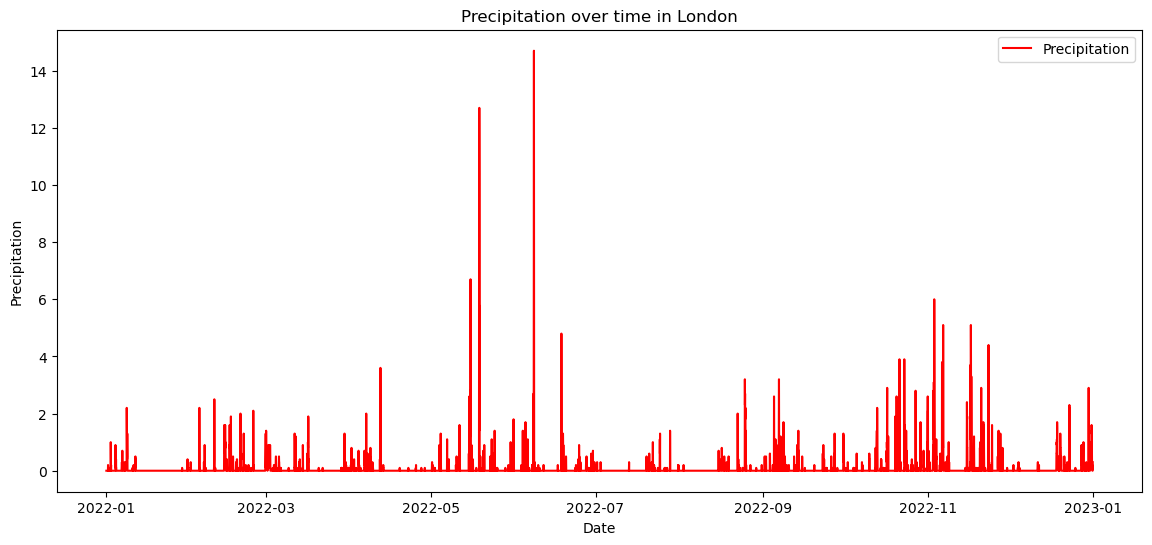

In [24]:
#Plotting precipitaion over time
plt.figure(figsize =(14,6))
plt.plot(df_ld.index, df_ld['precipitation'], color = 'red', label= 'Precipitation')
plt.title('Precipitation over time in London')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

In [26]:
#Resampling weekly totals for London
weekly_totals_ld = df_ld.resample('W').sum()
weekly_totals_ld.head()


,precipitation
time,
2022-01-02,2.2
2022-01-09,12.9
2022-01-16,3.1
2022-01-23,0.0
2022-01-30,0.1


In [28]:
#Coordinates for Seattle so we can compare both side by side
latitude_sea =  47.6062
longitude_sea = -122.3321
start_date_sea= "2022-01-01"
end_date_sea= "2022-12-31"

base_url_sea = 'https://archive-api.open-meteo.com/v1/archive'

#Setting up params

params_sea = {
             'latitude':latitude_sea,
             'longitude':longitude_sea,
             'start_date':start_date_sea,
             'end_date':end_date_sea,
             'hourly':['precipitation'],
             'timezone':'America/Los_Angeles'
}

response_sea = requests.get(base_url, params= params_sea)
    

In [30]:
#Check if the request was successfully fetched
if response_sea.status_code == 200:
    print('Data was successfully fetched!')
else:
    print(f"Data Fetching was unsuccessful. Status_code = {response_sea.status_code}")

Data was successfully fetched!


In [32]:
data_sea =response_sea.json()
hourly_data = data_sea['hourly']

df_sea = pd.DataFrame(hourly_data)
df_sea.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [34]:
df_sea.dtypes

time              object
precipitation    float64
dtype: object

In [36]:
df_sea['time'] = pd.to_datetime(df_sea['time'])

In [38]:
df_sea.columns

Index(['time', 'precipitation'], dtype='object')

In [40]:
df_sea.set_index(['time'], inplace= True)

In [42]:
df_sea.head()

,precipitation
time,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0


In [44]:
df_sea.describe()

,precipitation
count,8760.000000
mean,0.129132
std,0.463708
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.700000


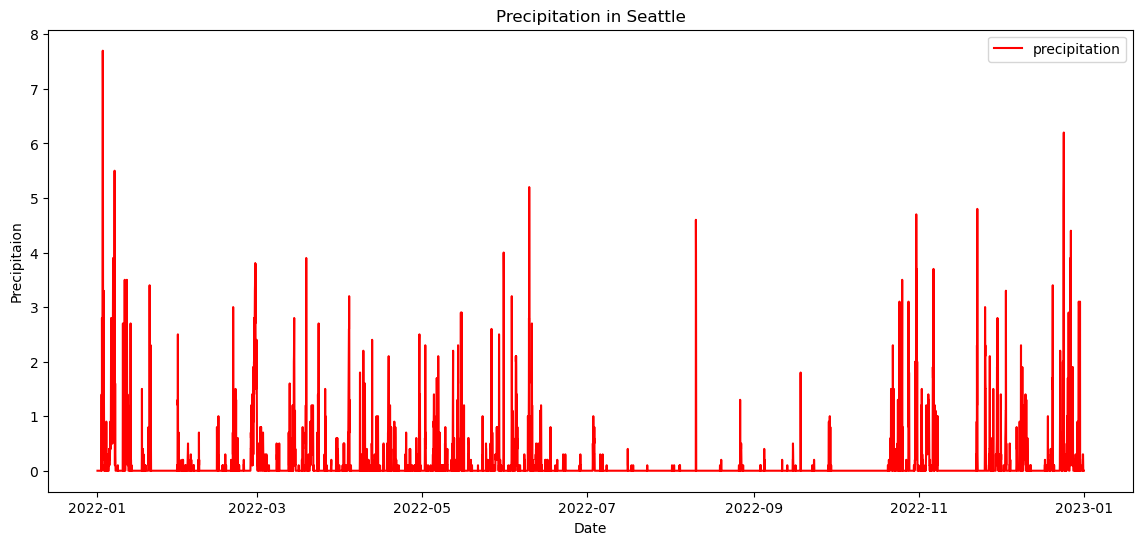

In [46]:
#Intially plotting before resampling

plt.figure(figsize=(14,6))
plt.plot(df_sea.index, df_sea['precipitation'], color ='red',  label= 'precipitation')
plt.title('Precipitation in Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitaion')
plt.legend()
plt.show()

In [48]:
#Resampling weeklytotals for Seattle
weekly_totals_sea = df_sea.resample('W').sum()
weekly_totals_sea.head()

,precipitation
time,
2022-01-02,31.3
2022-01-09,108.8
2022-01-16,45.5
2022-01-23,15.7
2022-01-30,6.1


In [50]:
#Combining both weekly totals to plot them in the same graph
combined_totals = pd.DataFrame({
    'London': weekly_totals_ld['precipitation'],
    'Seattle': weekly_totals_sea['precipitation']
})

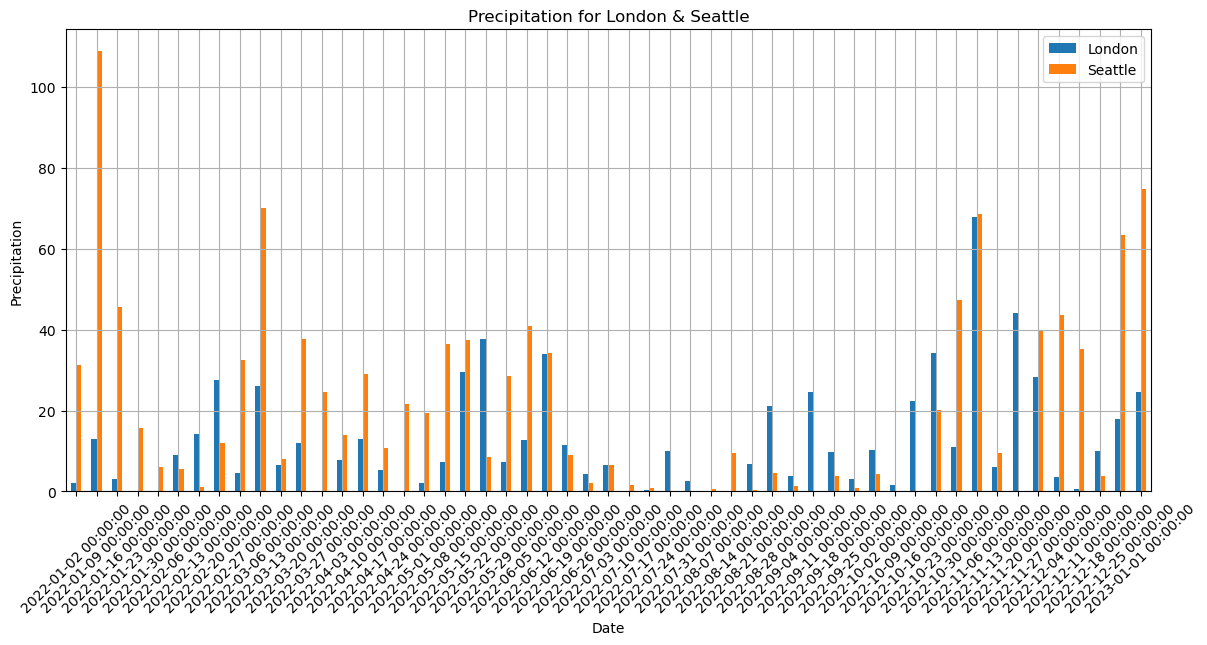

In [52]:
#Plotting both using bar graph

combined_totals.plot(kind='bar', figsize=(14,6))
plt.title('Precipitation for London & Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [54]:
print("London Total:", weekly_totals_ld['precipitation'].sum())
print("Seattle Total:", weekly_totals_sea['precipitation'].sum())

London Total: 662.8000000000001
Seattle Total: 1131.2


In 2022, Seattle recorded a total of approximately 1131.2 mm of precipitation, while London recorded around 662.8 mm. This confirms that Seattle experienced significantly more rainfall than London over the year. The weekly precipitation trends also show more frequent and intense rainfall events in Seattle, particularly at the beginning and end of the year.